In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h2o 
from h2o.estimators import H2OGeneralizedLinearEstimator

In [2]:
df = pd.read_csv('D:/ML/Kaggle/electricity/electricity_cost_dataset.csv')

In [3]:
df

site area structure type  water consumption  recycling rate  \
0          1360      Mixed-use             2519.0              69   
1          4272      Mixed-use             2324.0              50   
2          3592      Mixed-use             2701.0              20   
3           966    Residential             1000.0              13   
4          4926    Residential             5990.0              23   
...         ...            ...                ...             ...   
9995        708     Commercial             1365.0              76   
9996       2960    Residential             3332.0              22   
9997       3942     Commercial             2427.0              61   
9998       3211     Commercial             4639.0              72   
9999       2837     Commercial             3124.0              50   

      utilisation rate  air qality index  issue reolution time  \
0                   52               188                     1   
1                   76               165                    65   
2                   94               198                    39   
3                   60                74                     3   
4                   65                32                    57   
...                ...               ...                   ...   
9995                77                22                    23   
9996                72               100                    47   
9997                43                48                    49   
9998                73               105                    55   
9999                57                 3                    10   

      resident count  electricity cost  
0                 72            1420.0  
1                261            3298.0  
2                117            3115.0  
3                 35            1575.0  
4                185            4301.0  
...              ...               ...  
9995               0             885.0  
9996              54            3081.0  
9997               0            3325.0  
9998               0            2892.0  
9999               0            2603.0  

[10000 rows x 9 columns]

In [4]:
### EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


In [6]:
numeric_df = df.select_dtypes(include=[np.number])

In [ ]:
numeric_df

<Figure size 1200x900 with 0 Axes>

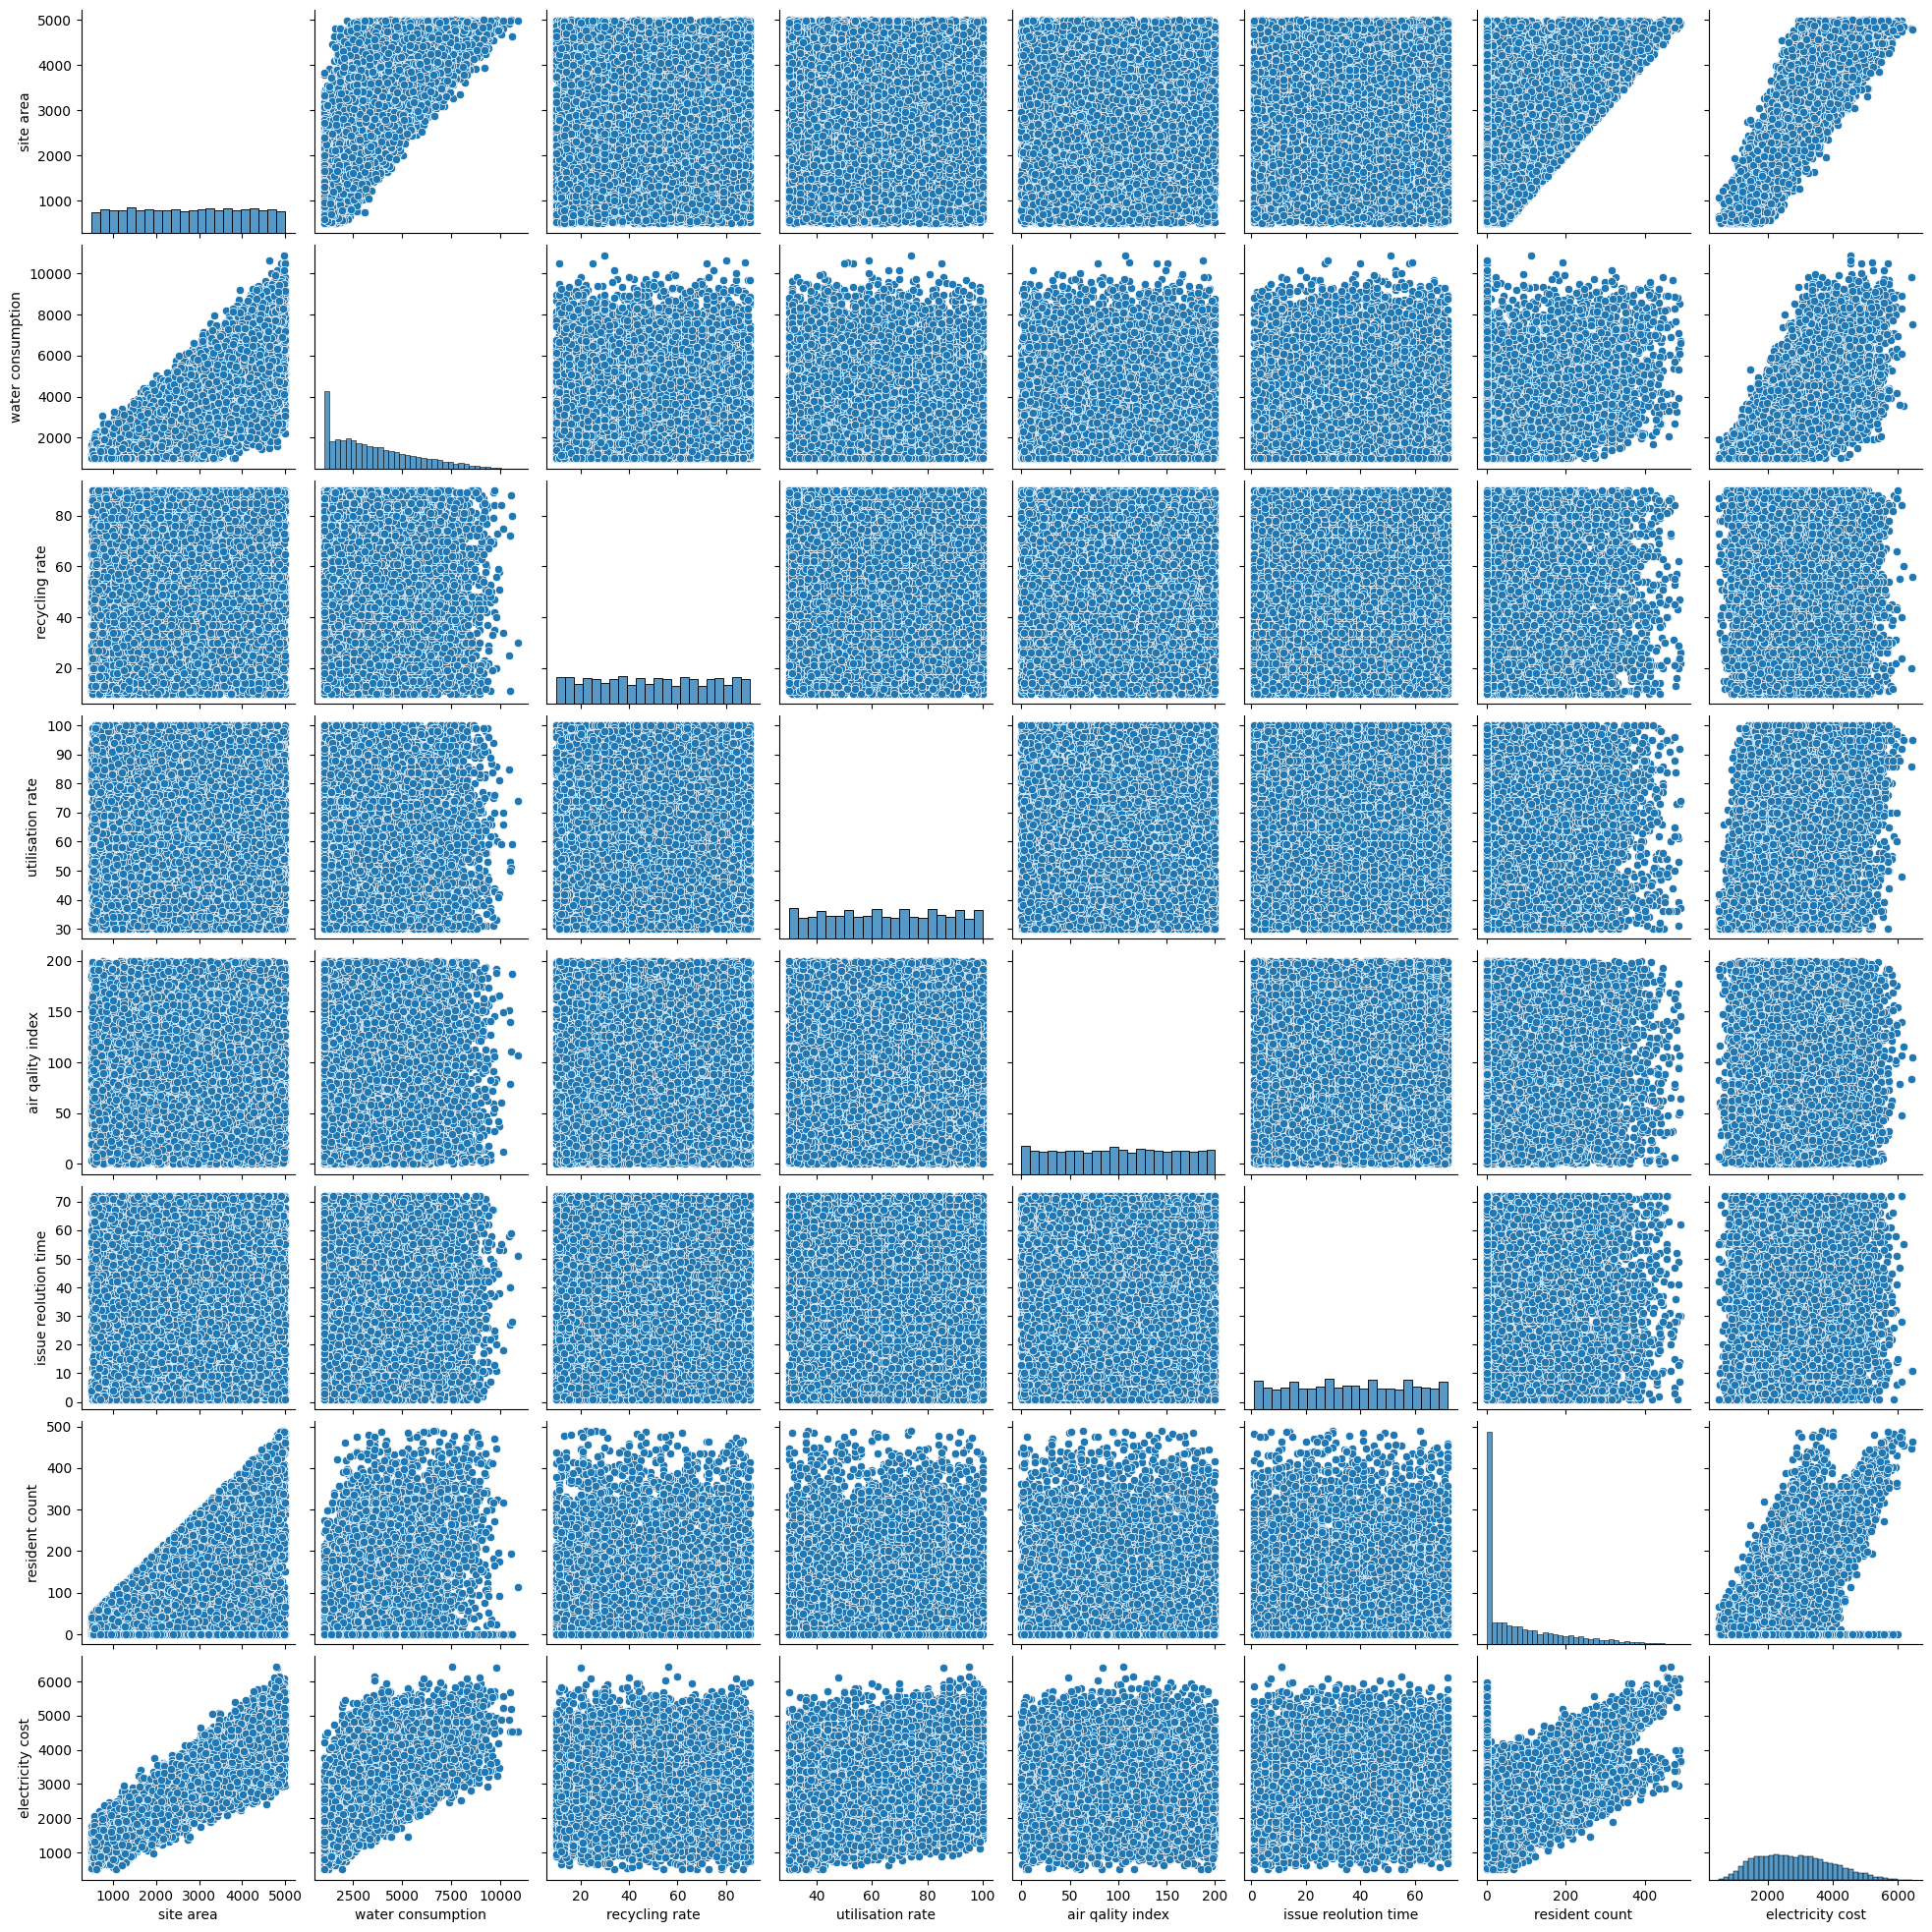

In [8]:
plt.figure(figsize=(12, 9))
sns.pairplot(numeric_df)
plt.show()

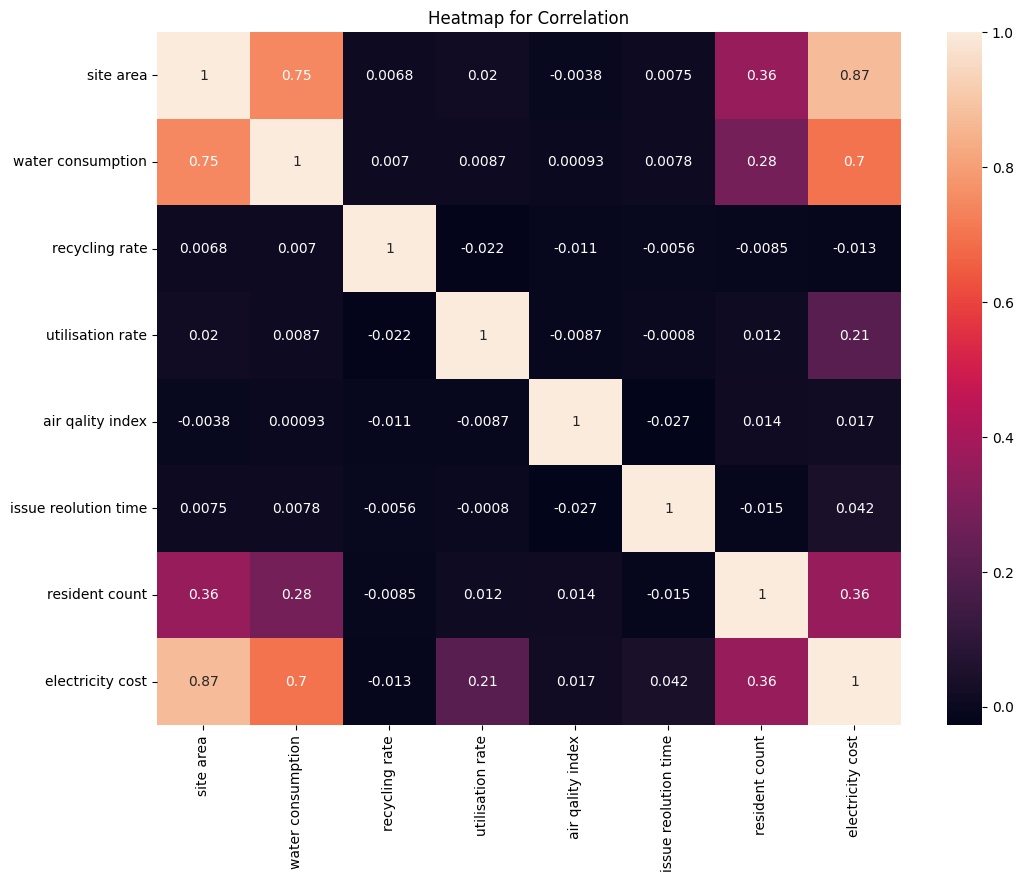

In [11]:
plt.figure(figsize=(12, 9))
sns.heatmap(data=numeric_df.corr(), annot=True)
plt.title('Heatmap for Correlation')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


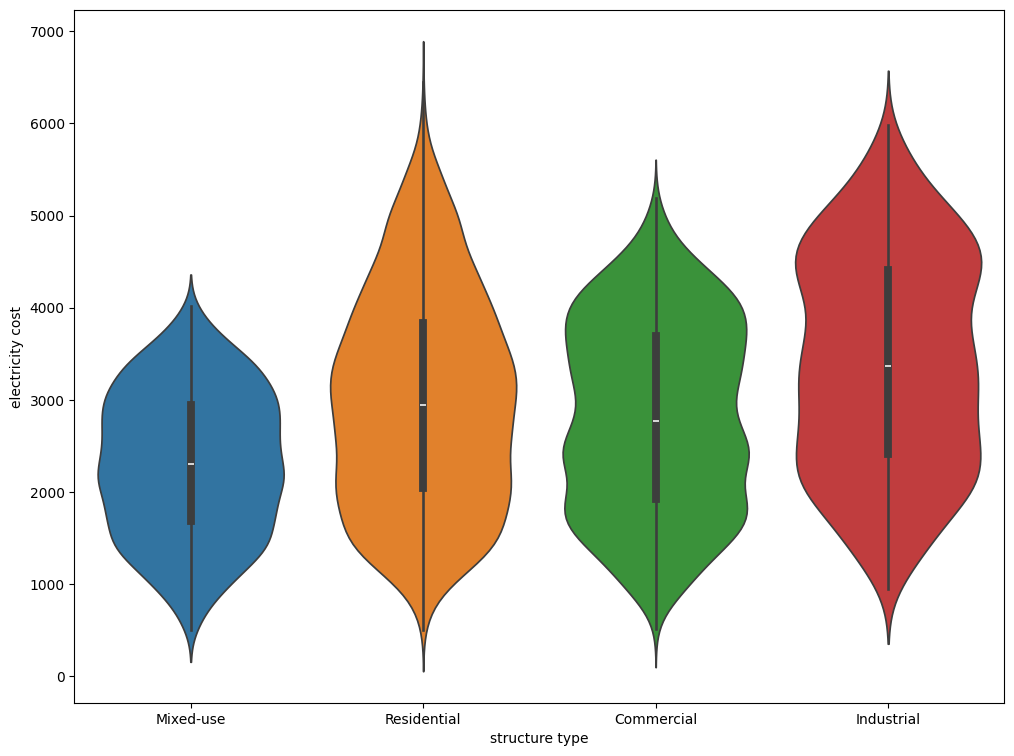

In [14]:
plt.figure(figsize=(12, 9))
sns.violinplot(data=df, x = 'structure type', 
               y= 'electricity cost', hue='structure type')
plt.show()

In [15]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.461-b11, mixed mode)
  Starting server from D:\anaconda\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\mhkir\AppData\Local\Temp\tmpvhrifxla
  JVM stdout: C:\Users\mhkir\AppData\Local\Temp\tmpvhrifxla\h2o_mhkir_started_from_python.out
  JVM stderr: C:\Users\mhkir\AppData\Local\Temp\tmpvhrifxla\h2o_mhkir_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Europe/Istanbul
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    8 months and 22 days
H2O_cluster_name:           H2O_from_python_mhkir_iyg5re
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.726 Gb
H2O_cluster_total_cores:    0
H2O_cluster_allowed_cores:  0
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.12.7 final
--------------------------  -----------------------------

In [16]:
df_h2o = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [17]:
df_h2o

site area  structure type      water consumption    recycling rate    utilisation rate    air qality index    issue reolution time    resident count    electricity cost
-----------  ----------------  -------------------  ----------------  ------------------  ------------------  ----------------------  ----------------  ------------------
       1360  Mixed-use                        2519                69                  52                 188                       1                72                1420
       4272  Mixed-use                        2324                50                  76                 165                      65               261                3298
       3592  Mixed-use                        2701                20                  94                 198                      39               117                3115
        966  Residential                      1000                13                  60                  74                       3                35                1575
       4926  Residential                      5990                23                  65                  32                      57               185                4301
       3944  Commercial                       6960                22                  43                 194                      59                 0                3800
       3671  Residential                      2803                24                  66                 149                      18               139                3661
       3419  Mixed-use                        5601                17                  61                 140                      21                38                2538
        630  Residential                      1000                20                  82                  92                      56                41                1390
       2185  Residential                      2170                32                  57                 133                      52               117                2599
[10000 rows x 9 columns]

In [18]:
df_h2o['structure type'] = df_h2o['structure type'].asfactor()

In [ ]:
df_train, df_valid, df_test= df_h2o.split_frame(ratios=[.7, .15], seed=123)

In [23]:
df_valid

site area  structure type      water consumption    recycling rate    utilisation rate    air qality index    issue reolution time    resident count    electricity cost
-----------  ----------------  -------------------  ----------------  ------------------  ------------------  ----------------------  ----------------  ------------------
        966  Residential                      1000                13                  60                  74                       3                35                1575
       1269  Residential                      1194                16                  94                 191                       8               124                2626
       4617  Residential                      8168                53                  43                  27                      29               175                4479
       3404  Commercial                       2380                78                  76                  57                      69                 0                3165
       2399  Mixed-use                        2364                20                  45                 188                      17                87                1596
       1767  Residential                      2721                19                  43                 128                      20                78                2009
       2028  Residential                      1138                44                  91                  81                      53               126                2900
       1863  Mixed-use                        3559                79                  79                 102                      70               144                2253
       1521  Residential                      1730                10                  83                  29                       6               129                2425
       2000  Mixed-use                        2113                72                  82                 198                      62                93                2049
[1482 rows x 9 columns]

In [22]:
df_test

site area  structure type      water consumption    recycling rate    utilisation rate    air qality index    issue reolution time    resident count    electricity cost
-----------  ----------------  -------------------  ----------------  ------------------  ------------------  ----------------------  ----------------  ------------------
        630  Residential                      1000                20                  82                  92                      56                41                1390
       2185  Residential                      2170                32                  57                 133                      52               117                2599
       3885  Commercial                       2164                12                  53                 182                      40                 0                3419
       2863  Commercial                       2985                50                  86                  65                      45                 0                3309
        741  Commercial                       1000                45                  80                  29                      14                 0                1475
        534  Residential                      1000                24                  58                  13                       6                29                1241
       4443  Mixed-use                        8658                90                  53                  36                      35               201                3047
        661  Commercial                       1000                22                  30                  81                      32                 0                 885
       1576  Commercial                       1000                40                  60                 132                      15                 0                1807
       2070  Residential                      1768                23                  72                 161                       5               206                3214
[1497 rows x 9 columns]

In [21]:
df_train

site area  structure type      water consumption    recycling rate    utilisation rate    air qality index    issue reolution time    resident count    electricity cost
-----------  ----------------  -------------------  ----------------  ------------------  ------------------  ----------------------  ----------------  ------------------
       1360  Mixed-use                        2519                69                  52                 188                       1                72                1420
       4272  Mixed-use                        2324                50                  76                 165                      65               261                3298
       3592  Mixed-use                        2701                20                  94                 198                      39               117                3115
       4926  Residential                      5990                23                  65                  32                      57               185                4301
       3944  Commercial                       6960                22                  43                 194                      59                 0                3800
       3671  Residential                      2803                24                  66                 149                      18               139                3661
       3419  Mixed-use                        5601                17                  61                 140                      21                38                2538
       2891  Industrial                       5267                78                  76                 105                      25                 0                3714
       2933  Residential                      4817                41                 100                 181                      32               260                4140
       1684  Commercial                       2604                53                  61                  42                      70                 0                2100
[7021 rows x 9 columns]

In [28]:
df.columns

Index(['site area', 'structure type', 'water consumption', 'recycling rate',
       'utilisation rate', 'air qality index', 'issue reolution time',
       'resident count', 'electricity cost'],
      dtype='object')

In [29]:
response = 'electricity cost'
predictors = ['site area', 'structure type', 'water consumption', 'recycling rate',
       'utilisation rate', 'air qality index', 'issue reolution time',
       'resident count']

In [30]:
model = H2OGeneralizedLinearEstimator(family="gaussian", 
                                      compute_p_values=True, 
                                      remove_collinear_columns=True, 
                                      alpha=.4, 
                                      nfolds=5, 
                                      keep_cross_validation_predictions=True
)

In [32]:
model.train(x = predictors, 
             y = response, 
             training_frame=df_train, 
             validation_frame=df_valid)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1753383006318_1


GLM Model: summary
    family    link      regularization                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.4, lambda = 2.4241 )  11                            10                             1                       py_3_sid_9ea3

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 94076.64668440777
RMSE: 306.719165825039
MAE: 241.0871623297154
RMSLE: 0.16251533948283597
Mean Residual Deviance: 94076.64668440777
R^2: 0.9235451643803549
Null degrees of freedom: 7020
Residual degrees of freedom: 7010
Null deviance: 8639246046.609877
Residual deviance: 660512136.3712269
AIC: 100352.27988559681

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 95972.59550033257
RMSE: 309.7944407188944
MAE: 241.14569989728665
RMSLE: 0.15606284616804444
Mean Residual Deviance: 95972.59550033257
R^2: 0.9182978363979325
Null degrees of freedom: 1481
Residual degrees of freedom: 1471
Null deviance: 1742213840.5943801
Residual deviance: 142231386.53149286
AIC: 21230.968038266732

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 94504.52518934397
RMSE: 307.4158831116961
MAE: 241.56837919243227
RMSLE: 0.1629317764431667
Mean Residual Deviance: 94504.52518934397
R^2: 0.9231974332280125
Null degrees of freedom: 7020
Residual degrees of freedom: 7010
Null deviance: 8639784990.876781
Residual deviance: 663516271.3543841
AIC: 100384.14033177485

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     20095        539.385      19685.1       20340.7       19627.6       20919.4       19902.2
loglikelihood           0            0            0             0             0             0             0
mae                     241.583      3.60355      240.127       247.308       242.833       238.464       239.184
mean_residual_deviance  94504.6      4106.34      92999.2       101762        92969.4       91601.7       93190.7
mse                     94504.6      4106.34      92999.2       101762        92969.4       91601.7       93190.7
null_deviance           1.72796e+09  7.51361e+07  1.69869e+09   1.7488e+09    1.65742e+09   1.84867e+09   1.6862e+09
r2                      0.923145     0.00353173   0.924596      0.917701      0.92296       0.927401      0.923069
residual_deviance       1.32703e+08  6.77179e+06  1.2806e+08    1.43892e+08   1.27647e+08   1.34196e+08   1.29721e+08
rmse                    307.359      6.59135      304.958       319.002       304.909       302.658       305.271
rmsle                   0.16266      0.00719151   0.161368      0.165299      0.153345      0.172957      0.16033

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse     training_deviance    training_mae       training_r2         validation_rmse    validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ----------------  -------------------  -----------------  ------------------  -----------------  ---------------------  ------------------  ------------------
    2025-07-24 22:08:38  0.000 sec   0             8639246046.609886          1230486.5470175026
    2025-07-24 22:08:38  0.025 sec   1                                                            306.719165825039  94076.64668440

In [33]:
predictions = model.predict(df_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [36]:
perf = model.model_performance(df_test)
perf

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 99100.81391550126
RMSE: 314.8028175151888
MAE: 245.73643003444926
RMSLE: 0.1656071646180222
Mean Residual Deviance: 99100.81391550126
R^2: 0.9205951045294926
Null degrees of freedom: 1496
Residual degrees of freedom: 1486
Null deviance: 1873520617.648767
Residual deviance: 148353918.43150538
AIC: 21493.62968965025

In [ ]:
print(predictions)


  predict    StdErr
  1540.94  10.8962
  2488.35   7.86797
  3413.78  13.3319
  3082.88   8.34376
  1538.78  11.3781
  1068.15  12.5932
  3535.79  14.9687
  1065.39  12.157
  1902.86   9.44552
  2693.09  11.1168
[1497 rows x 2 columns]



NameError: name 'perf' is not defined

In [40]:
test

site area structure type  water consumption  recycling rate  \
0           630    Residential               1000              20   
1          2185    Residential               2170              32   
2          3885     Commercial               2164              12   
3          2863     Commercial               2985              50   
4           741     Commercial               1000              45   
...         ...            ...                ...             ...   
1492       1306     Commercial               1000              49   
1493       3139    Residential               3804              21   
1494       1664    Residential               1693              80   
1495       2837    Residential               4539              65   
1496       2837     Commercial               3124              50   

      utilisation rate  air qality index  issue reolution time  \
0                   82                92                    56   
1                   57               133                    52   
2                   53               182                    40   
3                   86                65                    45   
4                   80                29                    14   
...                ...               ...                   ...   
1492               100                61                     3   
1493                39                 9                    41   
1494                56                54                    16   
1495                79               126                    36   
1496                57                 3                    10   

      resident count  electricity cost         pred  
0                 41              1390  1540.943715  
1                117              2599  2488.352511  
2                  0              3419  3413.779656  
3                  0              3309  3082.881625  
4                  0              1475  1538.781861  
...              ...               ...          ...  
1492               0              1909  2077.387126  
1493              87              2558  2837.963891  
1494              20              1160  1738.667787  
1495             168              3417  3294.494598  
1496               0              2603  2681.014053  

[1497 rows x 10 columns]

In [39]:
pred = predictions.as_data_frame()
test = df_test.as_data_frame()
test['pred'] = pred['predict']

d:\anaconda\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
d:\anaconda\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


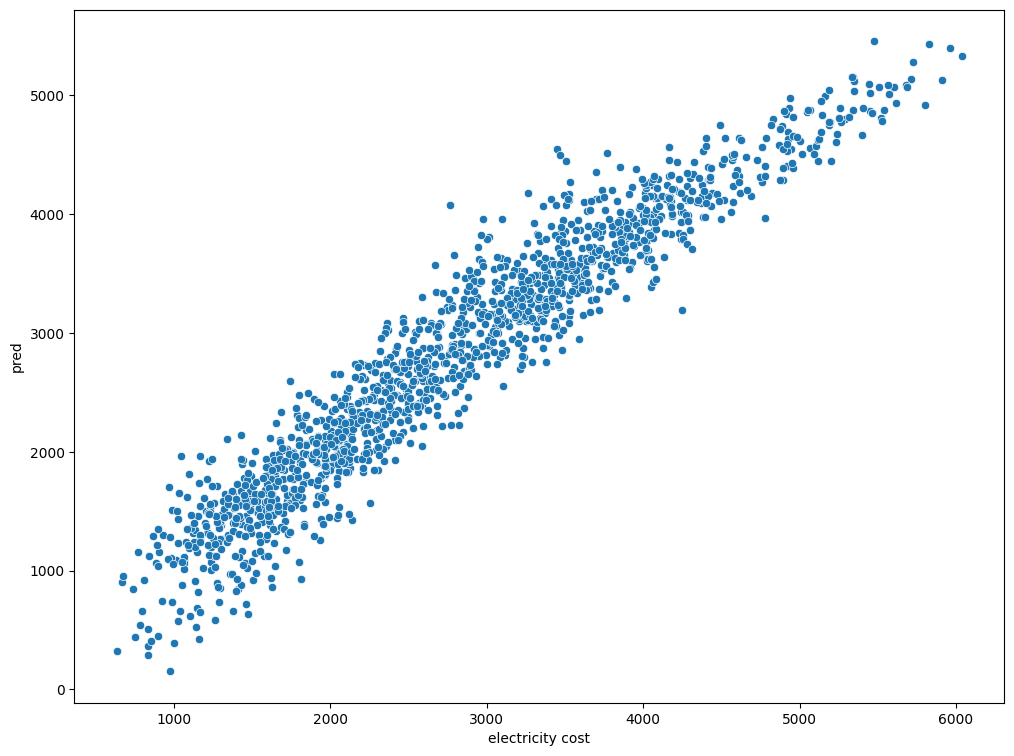

In [41]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=test, x = 'electricity cost', y = 'pred')
plt.show()

In [42]:
corr = test['electricity cost'].corr(test['pred'])
corr

0.9594856812365996